In [158]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [159]:
df = pd.read_csv("data_cleaning/data/machine_learning_homicide.csv", encoding = 'latin1')
df

,Victim Age,Victim Sex,Victim Race,Reported Date,Reported Day of Week,Report Month,City,State,Season,Population,Disposition
0,78,Male,Hispanic,5/4/2010,1,5,Albuquerque,NM,Spring,545852,No Arrest
1,17,Male,Hispanic,2/16/2010,1,2,Albuquerque,NM,Winter,545852,Arrest Made
2,15,Female,White,6/1/2010,1,6,Albuquerque,NM,Summer,545852,No Arrest
3,32,Male,Hispanic,1/1/2010,4,1,Albuquerque,NM,Winter,545852,Arrest Made
4,72,Female,White,1/2/2010,5,1,Albuquerque,NM,Winter,545852,No Arrest
...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,9/8/2016,3,9,Washington,DC,Fall,687576,Arrest Made
47474,19,Male,Black,9/13/2016,1,9,Washington,DC,Fall,687576,No Arrest
47475,23,Male,Black,11/14/2016,0,11,Washington,DC,Fall,687576,No Arrest
47476,24,Male,Black,11/30/2016,2,11,Washington,DC,Fall,687576,No Arrest


In [160]:
df.columns

Index(['Victim Age', 'Victim Sex ', 'Victim Race ', 'Reported Date ',
       'Reported Day of Week', 'Report Month', 'City', 'State', 'Season',
       'Population', 'Disposition'],
      dtype='object')

In [161]:
# Hint: 0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday

df['Reported Day of Week'].value_counts()

6    7850
5    7619
0    6853
4    6446
1    6331
2    6256
3    6123
Name: Reported Day of Week, dtype: int64

In [162]:
df['Reported Date '] = pd.to_datetime(df['Reported Date '])

df['Reported Day of Week'] = df['Reported Date '].dt.day_name()


df['Report Month'] = df['Reported Date '].dt.strftime('%B')

df['Reported Year'] = df['Reported Date '].dt.year

In [163]:
df

,Victim Age,Victim Sex,Victim Race,Reported Date,Reported Day of Week,Report Month,City,State,Season,Population,Disposition,Reported Year
0,78,Male,Hispanic,2010-05-04,Tuesday,May,Albuquerque,NM,Spring,545852,No Arrest,2010
1,17,Male,Hispanic,2010-02-16,Tuesday,February,Albuquerque,NM,Winter,545852,Arrest Made,2010
2,15,Female,White,2010-06-01,Tuesday,June,Albuquerque,NM,Summer,545852,No Arrest,2010
3,32,Male,Hispanic,2010-01-01,Friday,January,Albuquerque,NM,Winter,545852,Arrest Made,2010
4,72,Female,White,2010-01-02,Saturday,January,Albuquerque,NM,Winter,545852,No Arrest,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,2016-09-08,Thursday,September,Washington,DC,Fall,687576,Arrest Made,2016
47474,19,Male,Black,2016-09-13,Tuesday,September,Washington,DC,Fall,687576,No Arrest,2016
47475,23,Male,Black,2016-11-14,Monday,November,Washington,DC,Fall,687576,No Arrest,2016
47476,24,Male,Black,2016-11-30,Wednesday,November,Washington,DC,Fall,687576,No Arrest,2016


In [164]:
df.to_csv("data_cleaning/data/csv_for_ML")

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47478 entries, 0 to 47477
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Victim Age            47478 non-null  int64         
 1   Victim Sex            47478 non-null  object        
 2   Victim Race           47478 non-null  object        
 3   Reported Date         47478 non-null  datetime64[ns]
 4   Reported Day of Week  47478 non-null  object        
 5   Report Month          47478 non-null  object        
 6   City                  47478 non-null  object        
 7   State                 47478 non-null  object        
 8   Season                47478 non-null  object        
 9   Population            47478 non-null  int64         
 10  Disposition           47478 non-null  object        
 11  Reported Year         47478 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 4.3+ MB


In [166]:
# Assuming df is your DataFrame
df["Disposition"] = df["Disposition"].apply(lambda x: 1 if x == "Arrest Made" else 0)
df

,Victim Age,Victim Sex,Victim Race,Reported Date,Reported Day of Week,Report Month,City,State,Season,Population,Disposition,Reported Year
0,78,Male,Hispanic,2010-05-04,Tuesday,May,Albuquerque,NM,Spring,545852,0,2010
1,17,Male,Hispanic,2010-02-16,Tuesday,February,Albuquerque,NM,Winter,545852,1,2010
2,15,Female,White,2010-06-01,Tuesday,June,Albuquerque,NM,Summer,545852,0,2010
3,32,Male,Hispanic,2010-01-01,Friday,January,Albuquerque,NM,Winter,545852,1,2010
4,72,Female,White,2010-01-02,Saturday,January,Albuquerque,NM,Winter,545852,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,2016-09-08,Thursday,September,Washington,DC,Fall,687576,1,2016
47474,19,Male,Black,2016-09-13,Tuesday,September,Washington,DC,Fall,687576,0,2016
47475,23,Male,Black,2016-11-14,Monday,November,Washington,DC,Fall,687576,0,2016
47476,24,Male,Black,2016-11-30,Wednesday,November,Washington,DC,Fall,687576,0,2016


In [167]:
df.Disposition.value_counts()

0    24258
1    23220
Name: Disposition, dtype: int64

In [178]:
# Drop reported date column
df.drop(columns=['Reported Date '], inplace=True)

df

,Victim Age,Victim Sex,Victim Race,Reported Day of Week,Report Month,City,State,Season,Population,Disposition,Reported Year
0,78,Male,Hispanic,Tuesday,May,Albuquerque,NM,Spring,545852,0,2010
1,17,Male,Hispanic,Tuesday,February,Albuquerque,NM,Winter,545852,1,2010
2,15,Female,White,Tuesday,June,Albuquerque,NM,Summer,545852,0,2010
3,32,Male,Hispanic,Friday,January,Albuquerque,NM,Winter,545852,1,2010
4,72,Female,White,Saturday,January,Albuquerque,NM,Winter,545852,0,2010
...,...,...,...,...,...,...,...,...,...,...,...
47473,29,Male,Black,Thursday,September,Washington,DC,Fall,687576,1,2016
47474,19,Male,Black,Tuesday,September,Washington,DC,Fall,687576,0,2016
47475,23,Male,Black,Monday,November,Washington,DC,Fall,687576,0,2016
47476,24,Male,Black,Wednesday,November,Washington,DC,Fall,687576,0,2016


In [179]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

2
Male      40387
Female     7091
Name: Victim Sex , dtype: int64

5
Black       33062
Hispanic     6817
White        6259
Asian         676
Other         664
Name: Victim Race , dtype: int64

7
Sunday       7850
Saturday     7619
Monday       6853
Friday       6446
Tuesday      6331
Wednesday    6256
Thursday     6123
Name: Reported Day of Week, dtype: int64

12
July         4624
August       4360
June         4273
May          4210
September    4131
October      4060
December     3890
November     3886
April        3779
January      3682
March        3622
February     2961
Name: Report Month, dtype: int64

47
Chicago           5523
Philadelphia      3036
Houston           2908
Baltimore         2827
Detroit           2496
Los Angeles       2196
St. Louis         1661
Memphis           1510
New Orleans       1394
Indianapolis      1321
Washington        1308
Las Vegas         1299
Jacksonville      1151
Milwaukee         1115
Columbus          1070
Atlanta            968
Oakland      

In [180]:
df2 = pd.get_dummies(df)
df2

,Victim Age,Population,Disposition,Reported Year,Victim Sex _Female,Victim Sex _Male,Victim Race _Asian,Victim Race _Black,Victim Race _Hispanic,Victim Race _Other,...,State_OK,State_PA,State_TN,State_TX,State_VA,State_WI,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,78,545852,0,2010,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,17,545852,1,2010,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,15,545852,0,2010,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,32,545852,1,2010,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,72,545852,0,2010,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47473,29,687576,1,2016,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
47474,19,687576,0,2016,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
47475,23,687576,0,2016,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
47476,24,687576,0,2016,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [181]:
df2.Disposition.value_counts()

0    24258
1    23220
Name: Disposition, dtype: int64

In [182]:
df2.dtypes

Victim Age            int64
Population            int64
Disposition           int64
Reported Year         int64
Victim Sex _Female    uint8
                      ...  
State_WI              uint8
Season_Fall           uint8
Season_Spring         uint8
Season_Summer         uint8
Season_Winter         uint8
Length: 108, dtype: object

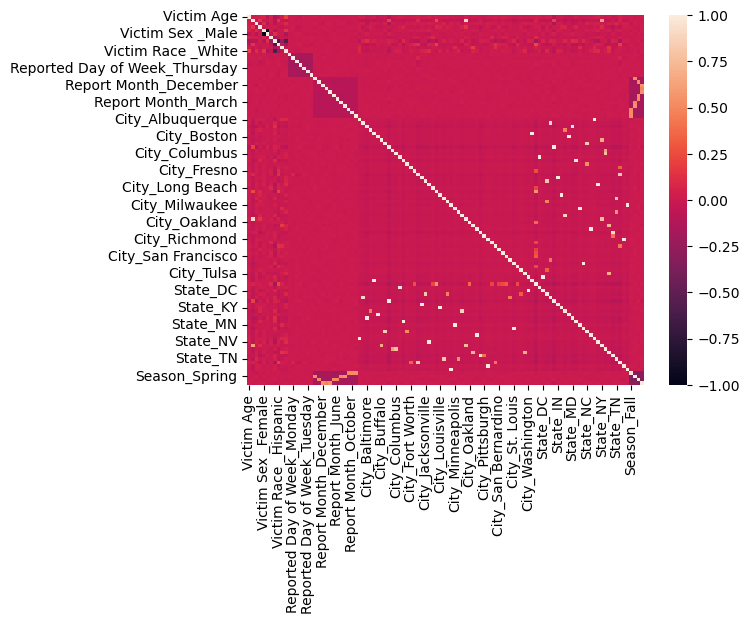

In [183]:
corrs = df2.corr()
sns.heatmap(corrs)
plt.show()

In [184]:
abs(corrs["Disposition"]).sort_values(ascending=False)

Disposition                       1.000000
State_IL                          0.162975
City_Chicago                      0.162975
Victim Race _White                0.106228
Victim Sex _Female                0.102491
                                    ...   
Reported Day of Week_Saturday     0.000664
Reported Day of Week_Wednesday    0.000546
State_MN                          0.000473
City_Minneapolis                  0.000473
City_Jacksonville                 0.000296
Name: Disposition, Length: 108, dtype: float64

In [185]:
# Create our train/test set
X = df2.drop(columns=["Disposition"])
y = df2["Disposition"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35608, 107) (35608,)
(11870, 107) (11870,)


In [186]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[18193     0]
 [17415     0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     18193
           1       0.00      0.00      0.00     17415

    accuracy                           0.51     35608
   macro avg       0.26      0.50      0.34     35608
weighted avg       0.26      0.51      0.35     35608


TESTING SET METRICS
[[6065    0]
 [5805    0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      6065
           1       0.00      0.00      0.00      5805

    accuracy                           0.51     11870
   macro avg       0.26      0.50      0.34     11870
weighted avg       0.26      0.51      0.35     11870



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metr

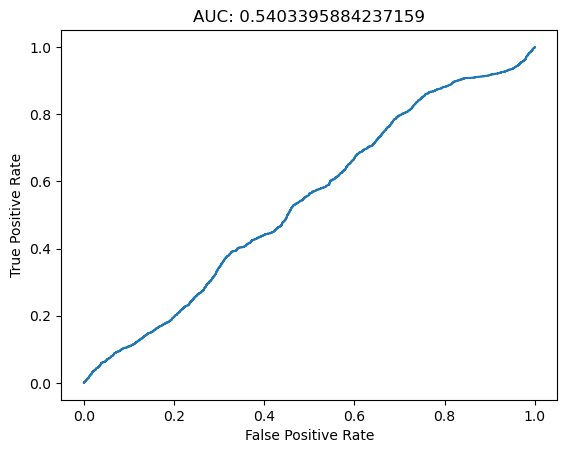

In [187]:
  # init the model
lr = LogisticRegression()
doMLClassification(lr, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[12263  5930]
 [ 6828 10587]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66     18193
           1       0.64      0.61      0.62     17415

    accuracy                           0.64     35608
   macro avg       0.64      0.64      0.64     35608
weighted avg       0.64      0.64      0.64     35608


TESTING SET METRICS
[[3876 2189]
 [2507 3298]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      6065
           1       0.60      0.57      0.58      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.60     11870
weighted avg       0.60      0.60      0.60     11870



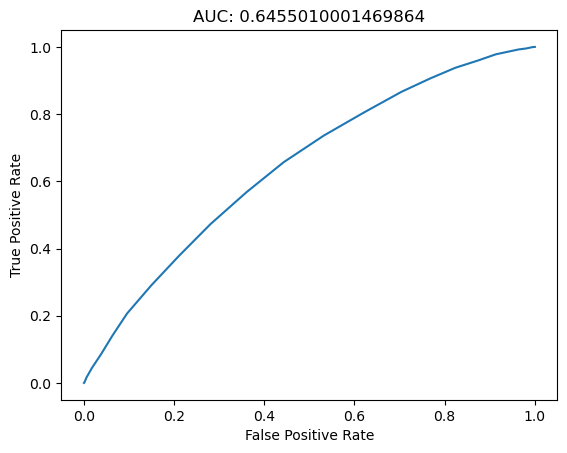

In [188]:
# init the model
knn = KNeighborsClassifier(n_neighbors=25)
doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[18189     4]
 [  223 17192]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18193
           1       1.00      0.99      0.99     17415

    accuracy                           0.99     35608
   macro avg       0.99      0.99      0.99     35608
weighted avg       0.99      0.99      0.99     35608


TESTING SET METRICS
[[3488 2577]
 [2609 3196]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      6065
           1       0.55      0.55      0.55      5805

    accuracy                           0.56     11870
   macro avg       0.56      0.56      0.56     11870
weighted avg       0.56      0.56      0.56     11870



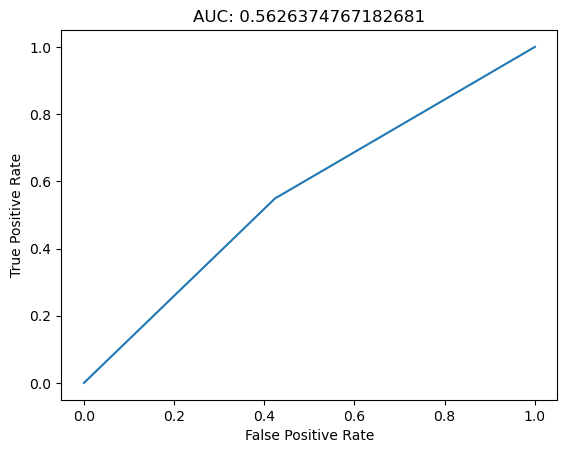

In [189]:
# init the model
dt = DecisionTreeClassifier(random_state=42)
doMLClassification(dt, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[18099    94]
 [  134 17281]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18193
           1       0.99      0.99      0.99     17415

    accuracy                           0.99     35608
   macro avg       0.99      0.99      0.99     35608
weighted avg       0.99      0.99      0.99     35608


TESTING SET METRICS
[[3613 2452]
 [2231 3574]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      6065
           1       0.59      0.62      0.60      5805

    accuracy                           0.61     11870
   macro avg       0.61      0.61      0.61     11870
weighted avg       0.61      0.61      0.61     11870



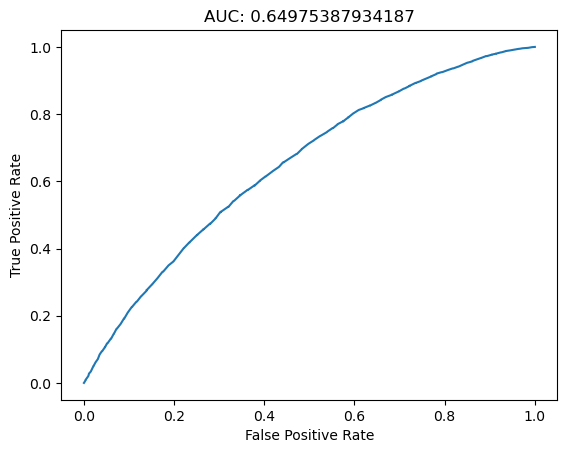

In [190]:
# init the model
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11510  6683]
 [ 6742 10673]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     18193
           1       0.61      0.61      0.61     17415

    accuracy                           0.62     35608
   macro avg       0.62      0.62      0.62     35608
weighted avg       0.62      0.62      0.62     35608


TESTING SET METRICS
[[3846 2219]
 [2271 3534]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6065
           1       0.61      0.61      0.61      5805

    accuracy                           0.62     11870
   macro avg       0.62      0.62      0.62     11870
weighted avg       0.62      0.62      0.62     11870



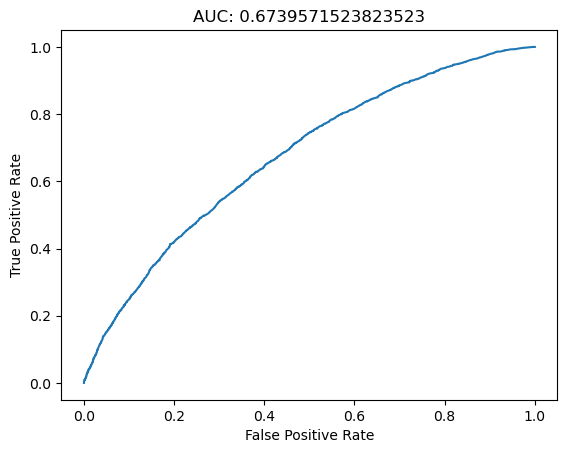

In [191]:
# init the model
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[18189     4]
 [  223 17192]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18193
           1       1.00      0.99      0.99     17415

    accuracy                           0.99     35608
   macro avg       0.99      0.99      0.99     35608
weighted avg       0.99      0.99      0.99     35608


TESTING SET METRICS
[[3556 2509]
 [2366 3439]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      6065
           1       0.58      0.59      0.59      5805

    accuracy                           0.59     11870
   macro avg       0.59      0.59      0.59     11870
weighted avg       0.59      0.59      0.59     11870



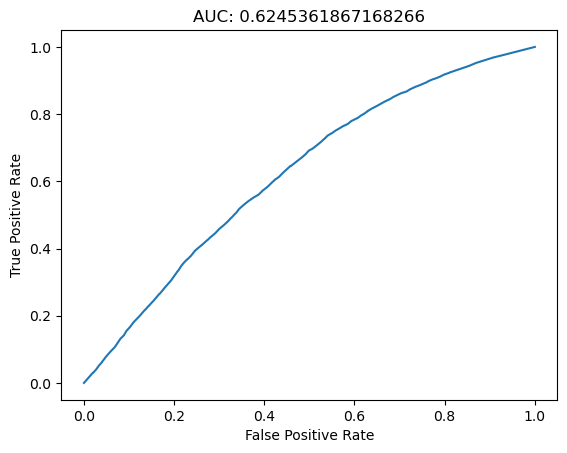

In [192]:
# init the model
et = ExtraTreesClassifier(random_state=42)
doMLClassification(et, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11900  6293]
 [ 6783 10632]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65     18193
           1       0.63      0.61      0.62     17415

    accuracy                           0.63     35608
   macro avg       0.63      0.63      0.63     35608
weighted avg       0.63      0.63      0.63     35608


TESTING SET METRICS
[[3937 2128]
 [2288 3517]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6065
           1       0.62      0.61      0.61      5805

    accuracy                           0.63     11870
   macro avg       0.63      0.63      0.63     11870
weighted avg       0.63      0.63      0.63     11870



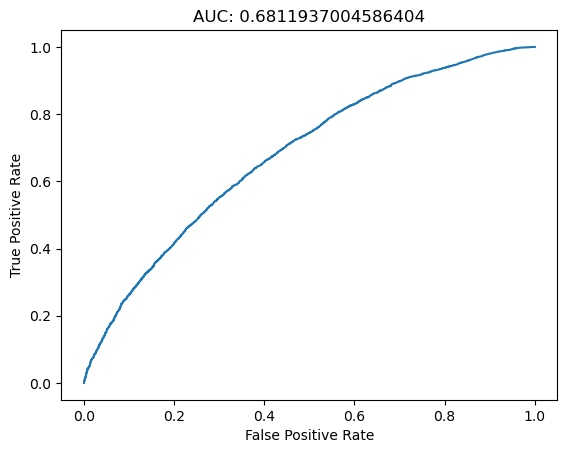

In [193]:
# init the model
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[13452  4741]
 [ 5276 12139]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     18193
           1       0.72      0.70      0.71     17415

    accuracy                           0.72     35608
   macro avg       0.72      0.72      0.72     35608
weighted avg       0.72      0.72      0.72     35608


TESTING SET METRICS
[[3929 2136]
 [2322 3483]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6065
           1       0.62      0.60      0.61      5805

    accuracy                           0.62     11870
   macro avg       0.62      0.62      0.62     11870
weighted avg       0.62      0.62      0.62     11870



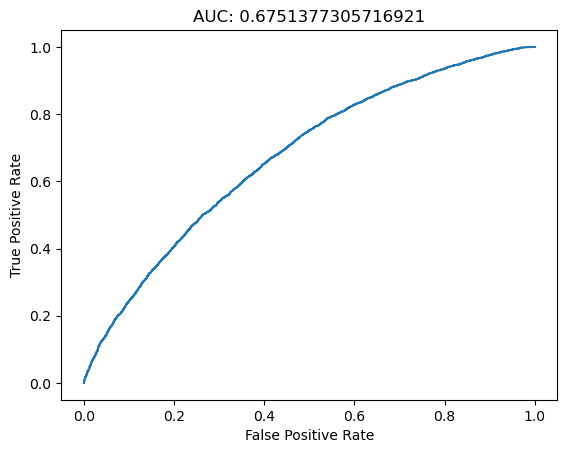

In [194]:
 # init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17415, number of negative: 18193
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 35608, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489075 -> initscore=-0.043705
[LightGBM] [Info] Start training from score -0.043705
TRAINING SET METRICS
[[12166  6027]
 [ 5810 11605]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67     18193
           1       0.66      0.67      0.66     17415

    accuracy                           0.67     35608
   macro avg       0.67      0.67      0.67     35608
weighted avg       0.67      0.67  

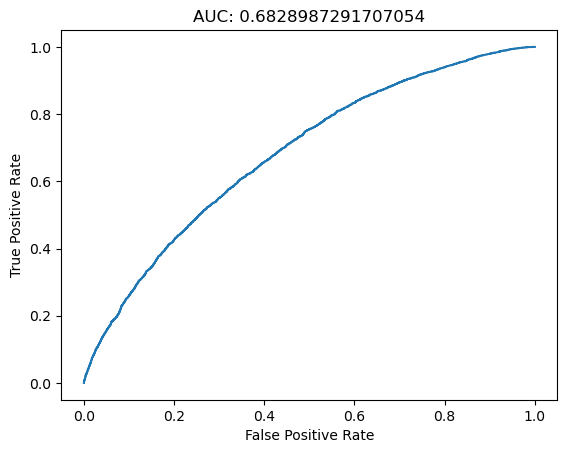

In [195]:
 # init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[13452  4741]
 [ 5276 12139]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     18193
           1       0.72      0.70      0.71     17415

    accuracy                           0.72     35608
   macro avg       0.72      0.72      0.72     35608
weighted avg       0.72      0.72      0.72     35608


TESTING SET METRICS
[[3929 2136]
 [2322 3483]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6065
           1       0.62      0.60      0.61      5805

    accuracy                           0.62     11870
   macro avg       0.62      0.62      0.62     11870
weighted avg       0.62      0.62      0.62     11870



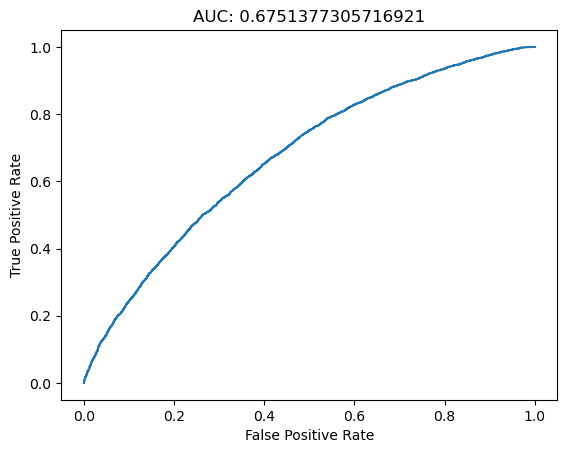

In [199]:
 # init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17415, number of negative: 18193
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 35608, number of used features: 107
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489075 -> initscore=-0.043705
[LightGBM] [Info] Start training from score -0.043705
TRAINING SET METRICS
[[12166  6027]
 [ 5810 11605]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67     18193
           1       0.66      0.67      0.66     17415

    accuracy                           0.67     35608
   macro avg       0.67      0.67      0.67     35608
weighted avg       0.67      0.67      0.67     35608


TESTING SET METRICS
[[3803 2262]
 [2163 364

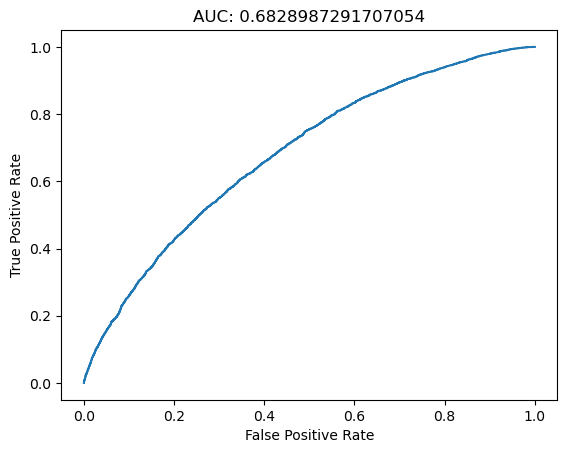

In [201]:
 # init the model
lgbm = LGBMClassifier(random_state=42)
doMLClassification(lgbm, X_train, y_train, X_test, y_test)

In [198]:
sorted(list(zip(lgb.feature_importances_, X.columns)), reverse=True)

[(672, 'Victim Age'),
 (525, 'Population'),
 (253, 'Reported Year'),
 (54, 'Victim Race _White'),
 (51, 'Victim Sex _Female'),
 (49, 'Victim Race _Black'),
 (45, 'Reported Day of Week_Sunday'),
 (42, 'Reported Day of Week_Friday'),
 (39, 'Reported Day of Week_Tuesday'),
 (38, 'Season_Summer'),
 (38, 'Reported Day of Week_Monday'),
 (35, 'Season_Spring'),
 (34, 'Report Month_December'),
 (34, 'City_New Orleans'),
 (33, 'Season_Fall'),
 (31, 'Reported Day of Week_Wednesday'),
 (31, 'Reported Day of Week_Thursday'),
 (30, 'Reported Day of Week_Saturday'),
 (30, 'City_Baltimore'),
 (29, 'City_Detroit'),
 (29, 'City_Chicago'),
 (28, 'City_Miami'),
 (26, 'Victim Race _Hispanic'),
 (26, 'Report Month_April'),
 (25, 'City_Milwaukee'),
 (24, 'Report Month_February'),
 (23, 'Season_Winter'),
 (23, 'Report Month_November'),
 (22, 'State_CA'),
 (22, 'Report Month_October'),
 (21, 'City_Richmond'),
 (20, 'State_FL'),
 (20, 'City_Fresno'),
 (20, 'City_Atlanta'),
 (18, 'State_TN'),
 (18, 'Report Mont

In [202]:
sorted(list(zip(lgbm.feature_importances_, X.columns)), reverse=True)

[(672, 'Victim Age'),
 (525, 'Population'),
 (253, 'Reported Year'),
 (54, 'Victim Race _White'),
 (51, 'Victim Sex _Female'),
 (49, 'Victim Race _Black'),
 (45, 'Reported Day of Week_Sunday'),
 (42, 'Reported Day of Week_Friday'),
 (39, 'Reported Day of Week_Tuesday'),
 (38, 'Season_Summer'),
 (38, 'Reported Day of Week_Monday'),
 (35, 'Season_Spring'),
 (34, 'Report Month_December'),
 (34, 'City_New Orleans'),
 (33, 'Season_Fall'),
 (31, 'Reported Day of Week_Wednesday'),
 (31, 'Reported Day of Week_Thursday'),
 (30, 'Reported Day of Week_Saturday'),
 (30, 'City_Baltimore'),
 (29, 'City_Detroit'),
 (29, 'City_Chicago'),
 (28, 'City_Miami'),
 (26, 'Victim Race _Hispanic'),
 (26, 'Report Month_April'),
 (25, 'City_Milwaukee'),
 (24, 'Report Month_February'),
 (23, 'Season_Winter'),
 (23, 'Report Month_November'),
 (22, 'State_CA'),
 (22, 'Report Month_October'),
 (21, 'City_Richmond'),
 (20, 'State_FL'),
 (20, 'City_Fresno'),
 (20, 'City_Atlanta'),
 (18, 'State_TN'),
 (18, 'Report Mont

In [203]:
sorted(list(zip(xgb.feature_importances_, X.columns)), reverse=True)

[(0.31473503, 'City_Chicago'),
 (0.046728205, 'City_Baltimore'),
 (0.043608174, 'State_TN'),
 (0.029775476, 'City_Detroit'),
 (0.0273338, 'City_New Orleans'),
 (0.025239654, 'State_AL'),
 (0.023950296, 'State_NC'),
 (0.018571611, 'Victim Race _White'),
 (0.016449507, 'City_Memphis'),
 (0.014489272, 'City_Miami'),
 (0.013432729, 'City_San Bernardino'),
 (0.012861389, 'City_Richmond'),
 (0.011782652, 'City_Philadelphia'),
 (0.011675755, 'Victim Sex _Female'),
 (0.010392036, 'State_GA'),
 (0.010334507, 'City_Tulsa'),
 (0.010177017, 'City_Stockton'),
 (0.009468982, 'Reported Year'),
 (0.00930857, 'City_Milwaukee'),
 (0.009097633, 'State_FL'),
 (0.008237761, 'City_Columbus'),
 (0.008207682, 'State_TX'),
 (0.00812078, 'State_LA'),
 (0.0077791535, 'City_Buffalo'),
 (0.00746252, 'City_Boston'),
 (0.0071558915, 'City_Fresno'),
 (0.0068159187, 'City_Omaha'),
 (0.006592556, 'City_Charlotte'),
 (0.0065627405, 'City_Las Vegas'),
 (0.0063418644, 'City_San Francisco'),
 (0.006193152, 'City_Houston'),

In [ ]:
sorted(list(zip(xgb.feature_importances_, X.columns)), reverse=True)

In [ ]:
sorted(list(zip(xgb.feature_importances_, X.columns)), reverse=True)

In [ ]:
sorted(list(zip(xgb.feature_importances_, X.columns)), reverse=True)